<a href="https://colab.research.google.com/github/uk-umesh/myassignments/blob/main/itcstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [25]:
import pandas as pd

# Construct the direct download URL
file_id = '13SlgjnQRGc4khlQaodKXKXIDfPWMTHzZ'
url = 'https://drive.google.com/uc?export=download&id=13SlgjnQRGc4khlQaodKXKXIDfPWMTHzZ'

# Load the CSV file, handling bad lines with on_bad_lines
df = pd.read_csv(url, delimiter=',', encoding='utf-8', on_bad_lines='warn')

# Display the first few rows of the dataframe
print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1996-01-01  5.550000  5.600000  5.533333  5.583333   3.198996    985500.0
1  1996-01-02  5.466666  5.566666  5.288888  5.372222   3.078039   7470000.0
2  1996-01-03  5.133333  5.254444  5.101111  5.200000   2.979365  15160500.0
3  1996-01-04  5.200000  5.332222  5.144444  5.297777   3.035386  12397500.0
4  1996-01-05  5.297777  5.277777  5.188888  5.202222   2.980637   5008500.0


Mean Absolute Error: 1.565121882480882
Mean Squared Error: 7.850443693988758
R² Score: 0.9994785204005677


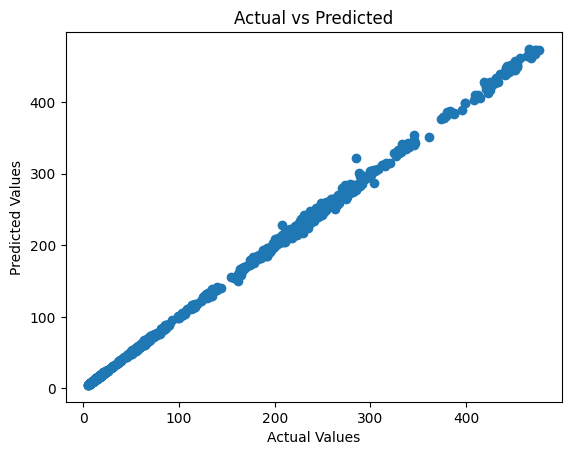

[424.91993206 423.21113767 422.01753859 422.13104698 422.72358681]


In [26]:
# Assuming the dataframe has a 'Date' column and a 'Close' column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering: Adding moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaN values (due to moving averages)
df.dropna(inplace=True)

# Define features and target
features = ['MA_5', 'MA_20', 'MA_50']
target = 'Close'

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Make predictions for the next 5 days (example)
future_data = df.tail(5)[features]
future_predictions = model.predict(future_data)
print(future_predictions)


[*********************100%%**********************]  1 of 1 completed


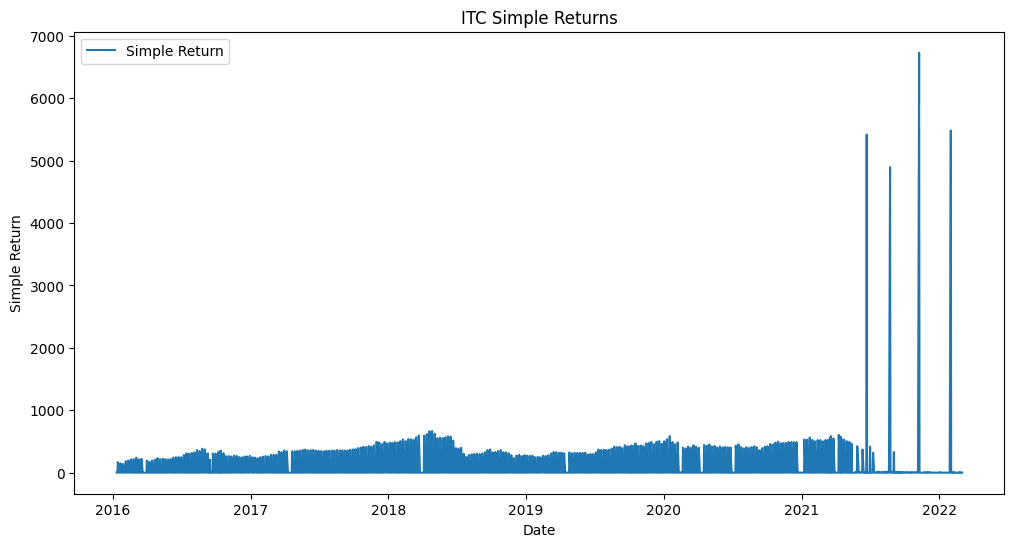

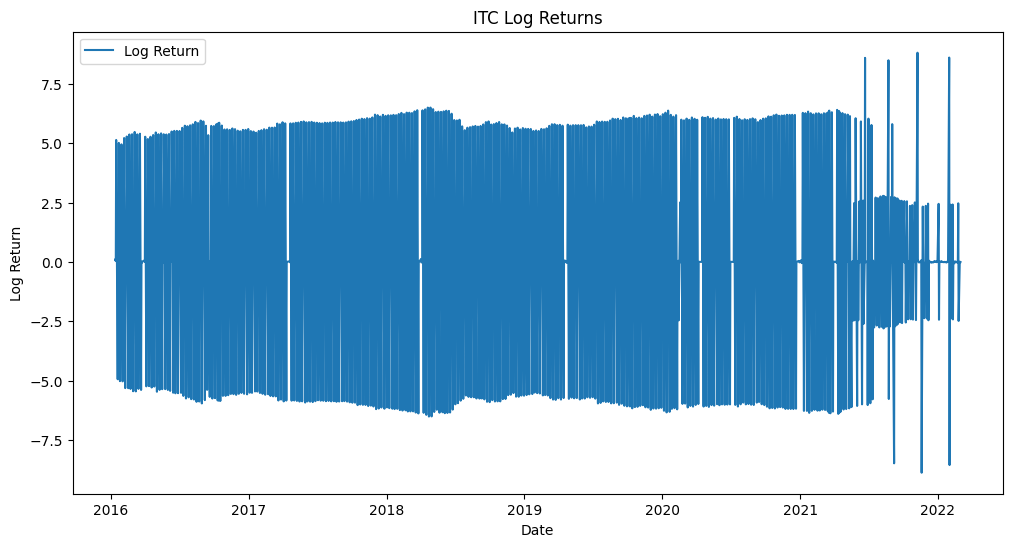

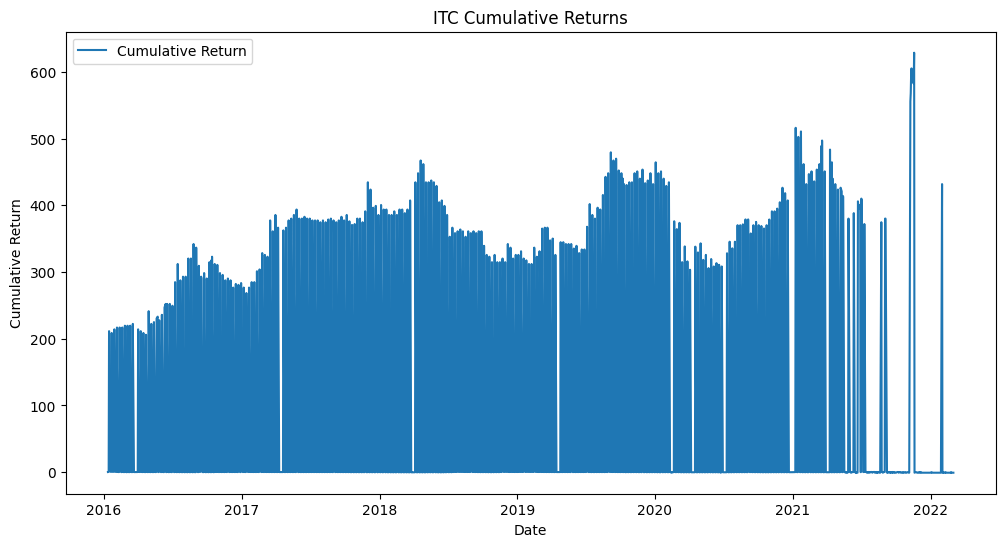

In [27]:
# Install yfinance
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical stock data
ticker = 'ITC'
stock_data = yf.download(ticker, start='1995-12-30', end='2023-06-28')

# Calculate simple returns
stock_data['Simple Return'] = stock_data['Adj Close'].pct_change()

# Calculate logarithmic returns
stock_data['Log Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

# Calculate cumulative returns
stock_data['Cumulative Return'] = (1 + stock_data['Simple Return']).cumprod() - 1

# Plot simple returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Simple Return'], label='Simple Return')
plt.title(f'{ticker} Simple Returns')
plt.xlabel('Date')
plt.ylabel('Simple Return')
plt.legend()
plt.show()

# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Log Return'], label='Log Return')
plt.title(f'{ticker} Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Cumulative Return'], label='Cumulative Return')
plt.title(f'{ticker} Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
